In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
from dateutil import parser
from dateutil.relativedelta import *
import re
%matplotlib inline

F:\softwares\ana\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
F:\softwares\ana\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('cities.csv')

In [3]:
df.count()

city                                                2692
year                                                2692
url                                                 2692
publish date                                        2692
title                                               2691
text                                                2677
category                                            2279
name                                                2691
location                                            1862
start_date                                          1862
end_date                                            1862
areas_affected                                      1862
rainfall                                            1822
damage                                              1791
deaths                                              1572
impact                                              1839
other_information                                    498
solutions                      

In [4]:
df.drop(df.iloc[:, 17:], inplace=True, axis=1)

In [5]:
df.head()

,city,year,url,publish date,title,text,category,name,location,start_date,end_date,areas_affected,rainfall,damage,deaths,impact,other_information
0,mumbai,2023,https://www.hindustantimes.com/ht-insight/clim...,3 weeks ago,Chennai floods a call for integrating climate ...,Stay tuned for all the latest updates on Ram M...,NaN,Not flood article,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mumbai,2023,https://www.newindianexpress.com/states/tamil-...,3 weeks ago,"TN floods overturn lives of betel farmers, vin...","As a result of the deluge, floodwater got accu...",issue,2022 Tamil Nadu floods,"Tamil Nadu, India","December 16, 2022","December 20, 2022","['Eral', 'Sernthapoomangalam', 'Others']","['100 mm', '200 mm', '300 mm']","['Destroyed betel vines', 'Damaged Agathi tree...",['0'],"['Loss of livelihood', 'Economic losses', 'Oth...",NaN
2,mumbai,2023,https://www.hindustantimes.com/cities/mumbai-n...,26 Jul 2023,"As rains intensify, seas rise and land sinks, ...",Stay tuned for all the latest updates on Ram M...,flood,Mumbai Floods 2022,"Mumbai, India","July 26, 2022","July 27, 2022","['Mumbai City', 'Mumbai Suburban', 'Thane', 'P...","['120 mm/day', '250 mm/day']","['Rs 100 crore', '100,000 people displaced']",['10'],"['Flooding', 'Landslides', 'Power outages', 'T...",NaN
3,mumbai,2023,https://timesofindia.indiatimes.com/city/mumba...,28 Jul 2023,Mumbai Floods: Mumbai areas flooded in another...,"(Inputs by Manoj Badgeri, Pradeep Gupta, Sandh...",flood,Mumbai Floods 2022,"Mumbai, India",26 July 2022,27 July 2022,"['Marine Lines', 'Dahisar', 'Borivli', 'Kandiv...","['223mm, 89mm, 90.8mm, 185mm, 144mm, 133mm']","['Parts of Marine Lines flooded', 'Power cuts ...",0,['Schools and colleges in Thane and Palghar wi...,NaN
4,mumbai,2023,https://www.indiatoday.in/law/story/mumbai-cou...,1 month ago,Mumbai courts don't stop working despite flood...,Madras High Court Chief Justice SV Gangapurwal...,discussion,Chennai Floods,"Chennai, Tamil Nadu, India","December 4, 2021","December 5, 2021",Chennai city,100 mm,$100 million,1,"Power outages, waterlogging, transportation di...",NaN


<h3>Bengaluru

In [125]:
b_df = df[df['city']=='bangalore']

b_df = b_df[b_df['category'].notna()]
b_df = b_df[b_df['category'].str.contains('flood|Flood')]

b_df = b_df[b_df['location'].notna()]
b_df = b_df[b_df['location'].str.contains('Bengaluru|Bangalore|Karnataka')]

b_df = b_df.reset_index(inplace=False)

In [129]:
from dateutil import parser

month_year = []

for i in range(len(b_df['publish date'])):
    if "present" in b_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(b_df['publish date'][i])
    except:
        datee = parser.parse(b_df['publish date'][i])
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

b_df['month_year'] = month_year

In [130]:
key = []
values = []
for i in b_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

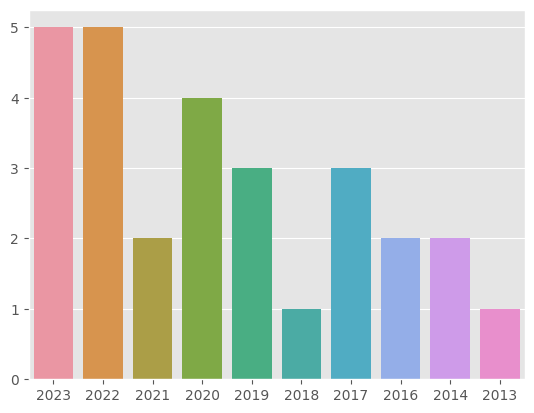

In [131]:
plt.style.use('ggplot')
sns.barplot(key, values)

In [2]:
gb_df = pd.read_csv('bangalore_with_severity.csv')

gb_df = gb_df[gb_df['city']=='bangalore']

gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]

gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Bengaluru|Bangalore|Karnataka')]

gb_df = gb_df.reset_index()

In [3]:
month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        datee = parser.parse(gb_df['publish date'][i])
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

gb_df['month_year'] = month_year

In [106]:
key = []
values = []
for i in gb_df['month_year']:
    try:
#         if i.split('-')[1] in key:
#             v = key.index(i.split('-')[1])
#             values[v] = values[v]+1
#             continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

In [107]:
gb_df['year']=key

In [52]:
gb_df['severity'] = gb_df['severity'].replace('Non-severe flood', 'Non-severe')

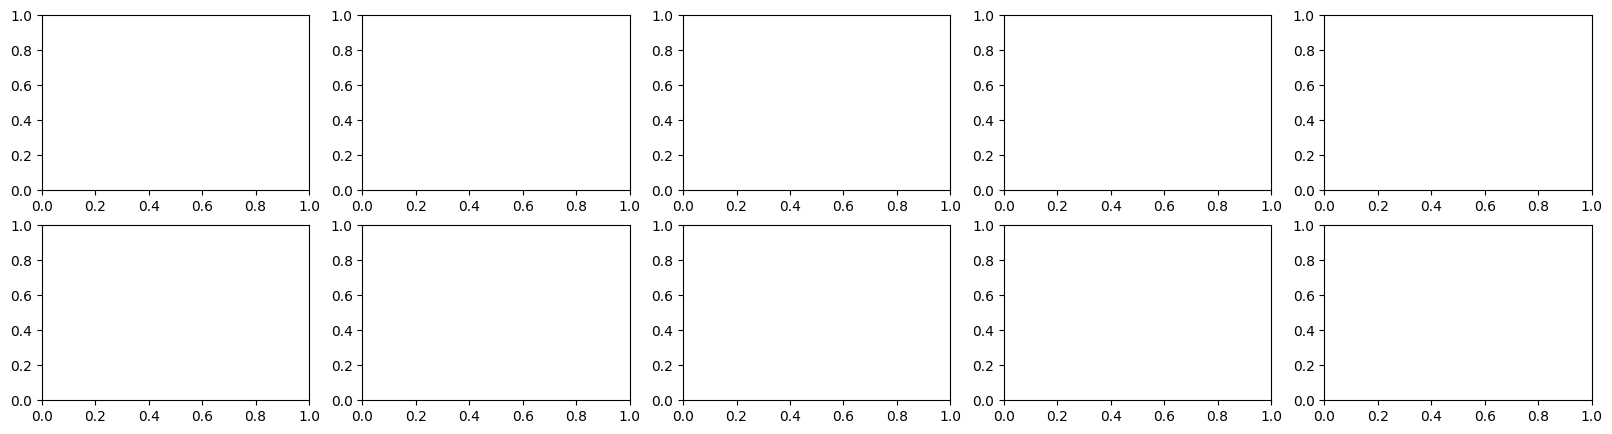

In [2]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))

In [4]:
for i in axes.flat:
    print(i)

Axes(0.125,0.53;0.133621x0.35)
Axes(0.285345,0.53;0.133621x0.35)
Axes(0.44569,0.53;0.133621x0.35)
Axes(0.606034,0.53;0.133621x0.35)
Axes(0.766379,0.53;0.133621x0.35)
Axes(0.125,0.11;0.133621x0.35)
Axes(0.285345,0.11;0.133621x0.35)
Axes(0.44569,0.11;0.133621x0.35)
Axes(0.606034,0.11;0.133621x0.35)
Axes(0.766379,0.11;0.133621x0.35)


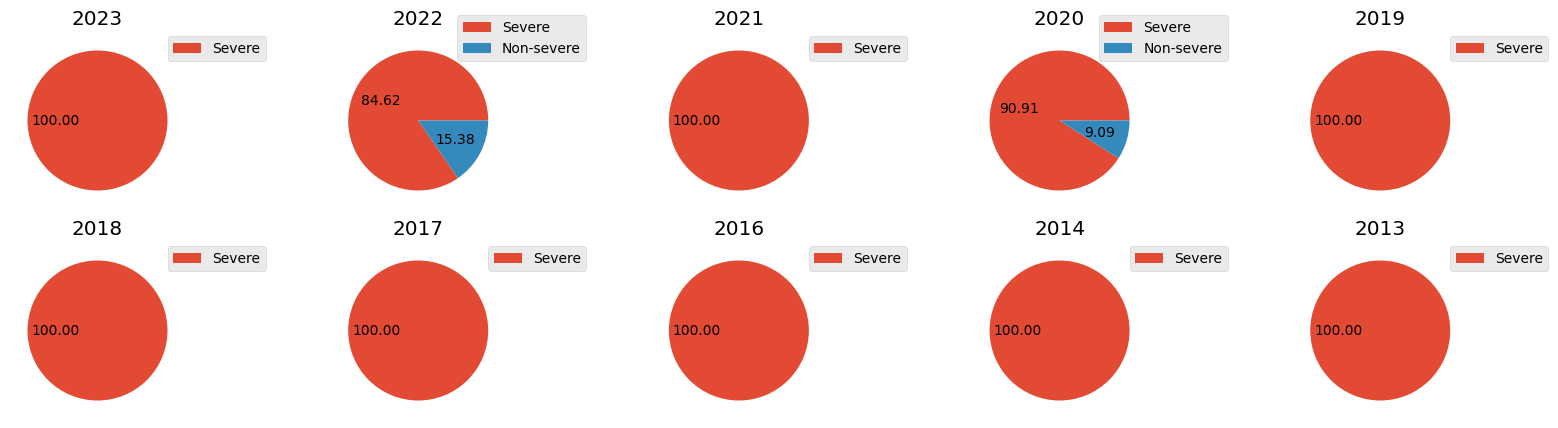

In [53]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))
for ax, col in zip(axes.flat, gb_df['year'].unique()):
    ax.pie(gb_df[gb_df['year']==col]['severity'].value_counts(), autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
    ax.legend(gb_df[gb_df['year']==col]['severity'].value_counts().index, loc='lower right', bbox_to_anchor=(1.5, 0.8))

plt.show()


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '9-2022'),
  Text(1, 0, '12-2022'),
  Text(2, 0, '11-2021'),
  Text(3, 0, '8-2021'),
  Text(4, 0, '8-2020'),
  Text(5, 0, '8-2019'),
  Text(6, 0, '9-2017'),
  Text(7, 0, '9-2013')])

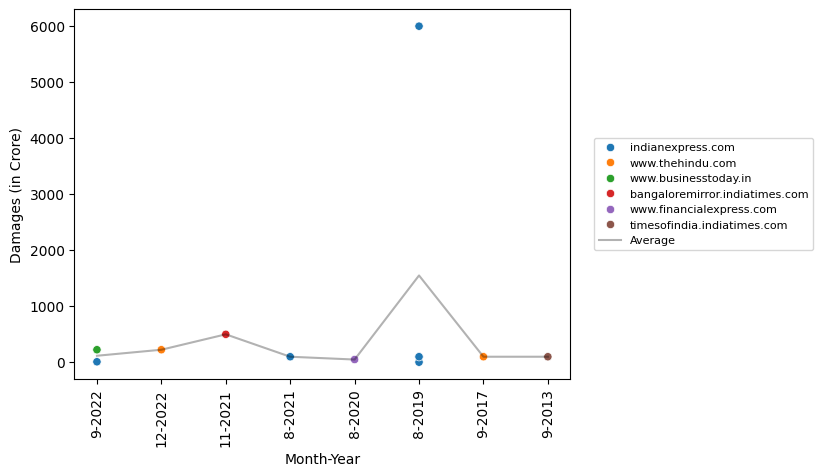

In [4]:
month = []
damages = []
site = []

for i in range(gb_df.shape[0]):
    try:
        if 'crore' in gb_df['damage'][i] or 'INR' in gb_df['damage'][i] or 'Rs' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
            te = gb_df['damage'][i].replace('[','').replace(']','')
            for k in te.split('Rs'):
                if 'crore' in k:
                    num = k.split('crore')[0].strip(".|'").strip().replace(',','')
                    n = re.findall(r'\d+', num)
                    damages.append(int(n[0]))
                    site.append(gb_df['url'][i].split('/')[2])
                    month.append(gb_df['month_year'][i])
                    break
    #     elif 'million' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'million' in k:
    #                 print('$ ',k.split('million')[0].strip(".|'").strip(), ' million')
    #                 break
    #     elif 'billion' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'billion' in k:
    #                 print('$ ',k.split('billion')[0].strip(".|'").strip(' '), ' billion')
    #                 break
    
    except:
        continue

dam_df = pd.DataFrame({'month':month, 'damages':damages, 'site':site})

avg = dam_df.groupby(dam_df['month'])['damages'].transform('mean')

p = sns.scatterplot(data = dam_df, x='month', y='damages', hue='site')
sns.lineplot(x = dam_df['month'],y = avg, color='black', alpha=0.3, label='Average')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), fontsize='8')
plt.xlabel('Month-Year')
plt.ylabel('Damages (in Crore)')
plt.xticks(rotation=90)

In [5]:
dam_df

,month,damages,site
0,9-2022,10,indianexpress.com
1,12-2022,225,www.thehindu.com
2,9-2022,225,www.businesstoday.in
3,11-2021,500,bangaloremirror.indiatimes.com
4,8-2021,100,indianexpress.com
5,8-2020,50,www.financialexpress.com
6,8-2019,100,indianexpress.com
7,8-2019,3,indianexpress.com
8,8-2019,100,indianexpress.com
9,8-2019,6000,indianexpress.com


<h3>Hyderabad

In [23]:
h_df = df[df['city']=='hyderabad']

In [24]:
h_df = h_df[h_df['category'].notna()]
h_df = h_df[h_df['category'].str.contains('flood|Flood')]

In [25]:
h_df = h_df[h_df['location'].notna()]
h_df = h_df[h_df['location'].str.contains('Hyderabad|Telangana')]

In [26]:
h_df = h_df.reset_index(inplace=False)

In [27]:


month_year = []

for i in range(len(h_df['publish date'])):
    if "present" in h_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(h_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in h_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(h_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in h_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(h_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

h_df['month_year'] = month_year

In [28]:
key = []
values = []
for i in h_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

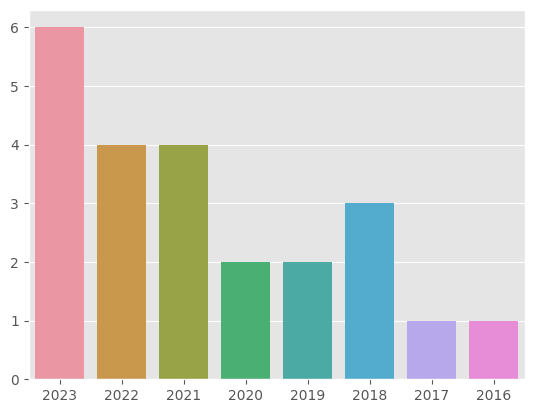

In [29]:
sns.barplot(key, values)

In [30]:
h_df = pd.read_csv('hyderabad_gemini.csv')

In [31]:
h_df = h_df[h_df['cat'].notna()]
h_df = h_df[h_df['cat'].str.contains('flood|Flood')]

In [32]:
h_df = h_df[h_df['location'].notna()]
h_df = h_df[h_df['location'].str.contains('Hyderabad|Telangana')]

In [33]:
h_df = h_df.reset_index(inplace=False)

In [34]:
month_year = []

for i in range(len(h_df['publish date'])):
    if "present" in h_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(h_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in h_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(h_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in h_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(h_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

h_df['month_year'] = month_year

In [35]:
key = []
values = []
for i in h_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

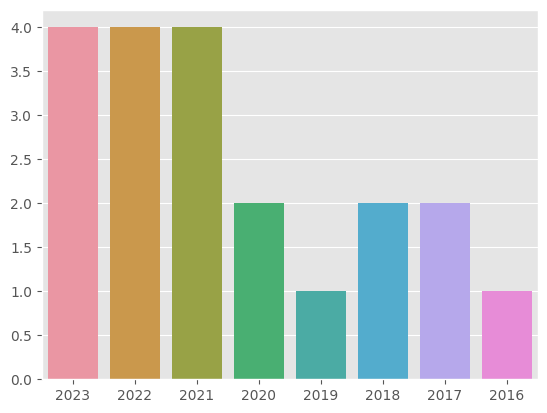

In [36]:
sns.barplot(key, values)

In [58]:
gb_df = pd.read_csv('hyderabad_with_severity.csv')
gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]
gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Hyderabad|Telangana')]
# gb_df = gb_df.drop(['level_0','index'], axis=1)
gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

gb_df['month_year'] = month_year

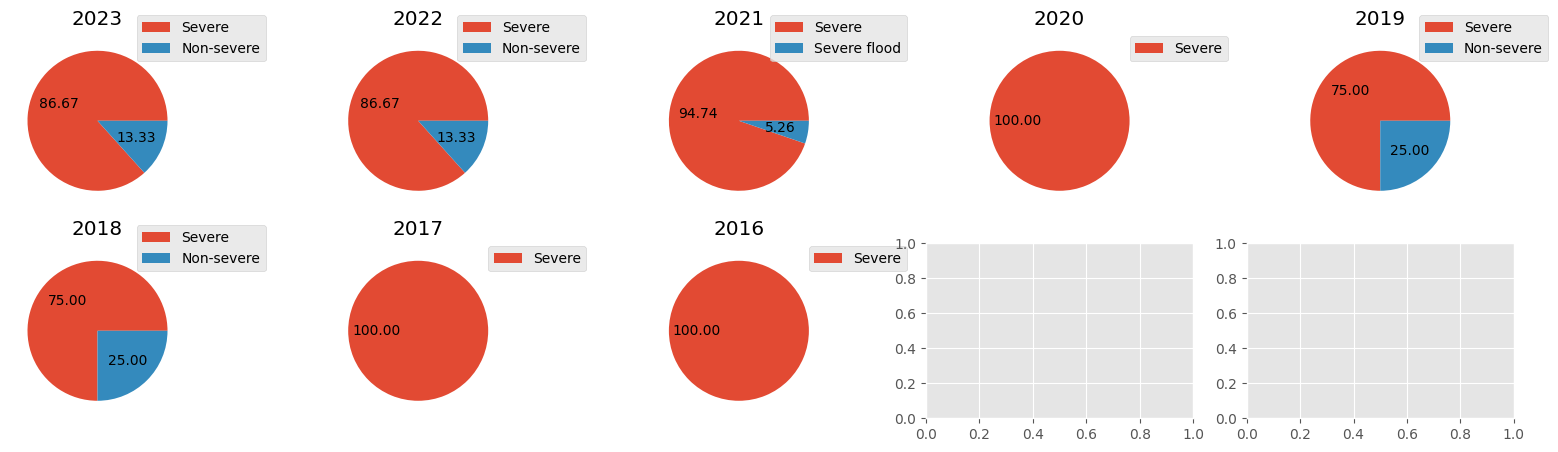

In [59]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))
for ax, col in zip(axes.flat, gb_df['year'].unique()):
    ax.pie(gb_df[gb_df['year']==col]['severity'].value_counts(), autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
    ax.legend(gb_df[gb_df['year']==col]['severity'].value_counts().index, loc='lower right', bbox_to_anchor=(1.5, 0.8))

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '9-2022'),
  Text(1, 0, '12-2022'),
  Text(2, 0, '11-2021'),
  Text(3, 0, '8-2021'),
  Text(4, 0, '8-2020'),
  Text(5, 0, '8-2019'),
  Text(6, 0, '9-2017'),
  Text(7, 0, '9-2013')])

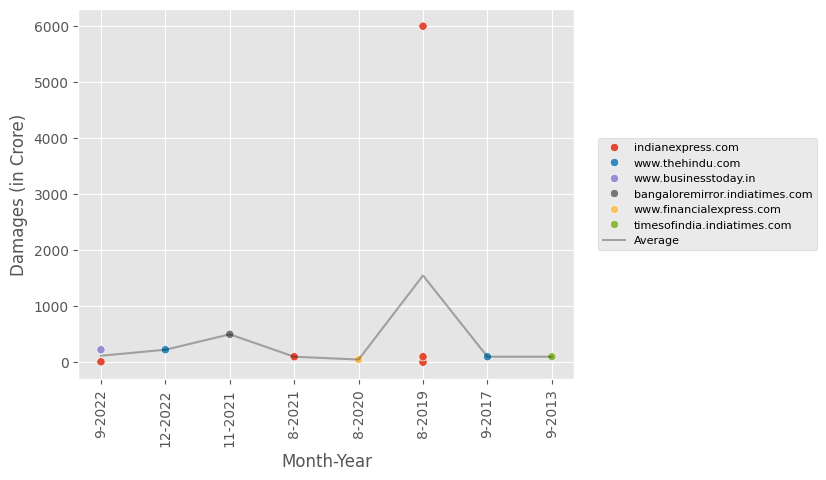

In [113]:
month = []
damages = []
site = []

for i in range(gb_df.shape[0]):
    try:
        if 'crore' in gb_df['damage'][i] or 'INR' in gb_df['damage'][i] or 'Rs' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
            te = gb_df['damage'][i].replace('[','').replace(']','')
            for k in te.split('Rs'):
                if 'crore' in k:
                    num = k.split('crore')[0].strip(".|'").strip().replace(',','')
                    n = re.findall(r'\d+', num)
                    damages.append(int(n[0]))
                    site.append(gb_df['url'][i].split('/')[2])
                    month.append(gb_df['month_year'][i])
                    break
    #     elif 'million' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'million' in k:
    #                 print('$ ',k.split('million')[0].strip(".|'").strip(), ' million')
    #                 break
    #     elif 'billion' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'billion' in k:
    #                 print('$ ',k.split('billion')[0].strip(".|'").strip(' '), ' billion')
    #                 break
    
    except:
        continue

dam_df = pd.DataFrame({'month':month, 'damages':damages, 'site':site})

avg = dam_df.groupby(dam_df['month'])['damages'].transform('mean')

p = sns.scatterplot(data = dam_df, x='month', y='damages', hue='site')
sns.lineplot(x = dam_df['month'],y = avg, color='black', alpha=0.3, label='Average')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), fontsize='8')
plt.xlabel('Month-Year')
plt.ylabel('Damages (in Crore)')
plt.xticks(rotation=90)

<h3>Chennai

In [39]:
c_df = df[df['city']=='chennai']

In [40]:
c_df = c_df[c_df['category'].notna()]
c_df = c_df[c_df['category'].str.contains('flood|Flood')]

In [41]:
c_df = c_df[c_df['location'].notna()]
c_df = c_df[c_df['location'].str.contains('Chennai|Tamil Nadu')]

In [42]:
c_df = c_df.reset_index()

In [43]:
from datetime import *
from dateutil import parser
from dateutil.relativedelta import *

month_year = []

for i in range(len(c_df['publish date'])):
    if "present" in c_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(c_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in c_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(c_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in c_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(c_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

c_df['month_year'] = month_year

In [134]:
key = []
values = []
for i in c_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

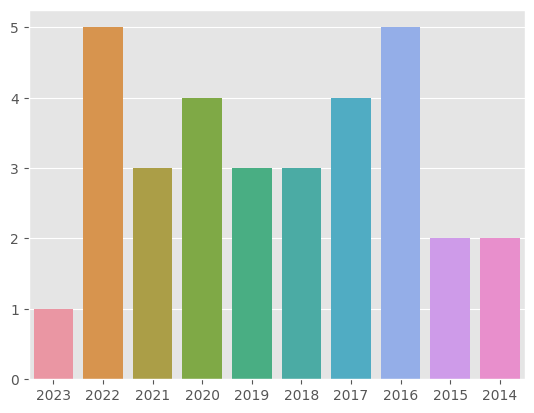

In [135]:
sns.barplot(key, values)

In [62]:
gb_df = pd.read_csv('chennai_with_severity.csv')
gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]
gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Chennai|Tamil Nadu')]
gb_df['severity'] = gb_df['severity'].replace('severe','Severe')
# gb_df = gb_df.drop(['level_0','index'], axis=1)
gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()
    
gb_df['month_year'] = month_year

In [63]:
key = []
values = []
for i in gb_df['month_year']:
    try:
#         if i.split('-')[1] in key:
#             v = key.index(i.split('-')[1])
#             values[v] = values[v]+1
#             continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue
gb_df['year']=key

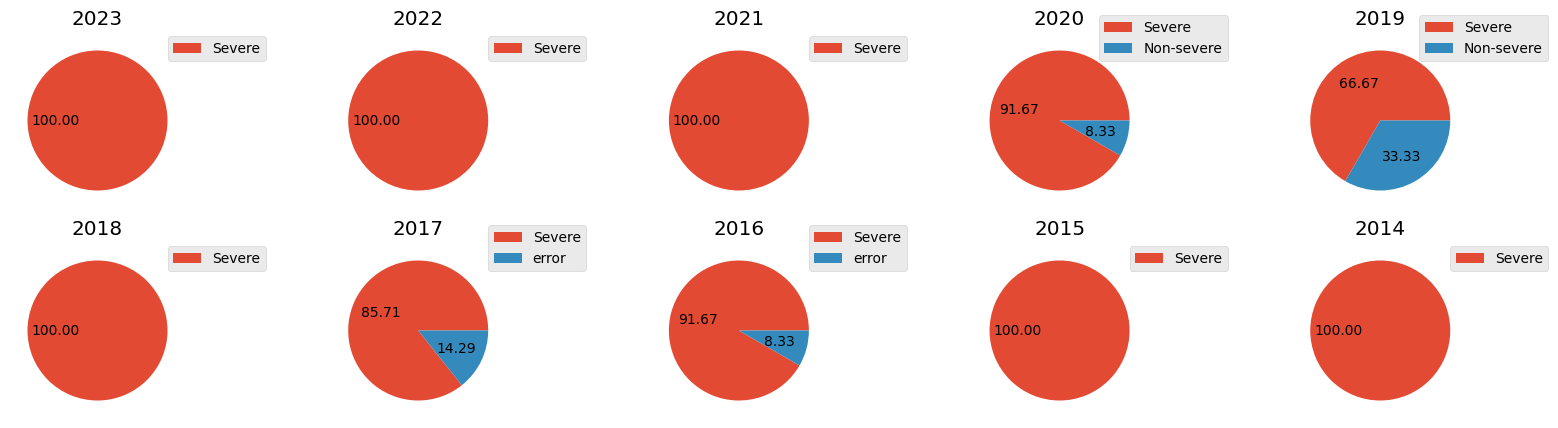

In [64]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))
for ax, col in zip(axes.flat, gb_df['year'].unique()):
    ax.pie(gb_df[gb_df['year']==col]['severity'].value_counts(), autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
    ax.legend(gb_df[gb_df['year']==col]['severity'].value_counts().index, loc='lower right', bbox_to_anchor=(1.5, 0.8))

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '12-2023'),
  Text(1, 0, '2-2022'),
  Text(2, 0, '4-2022'),
  Text(3, 0, '11-2021'),
  Text(4, 0, '11-2020'),
  Text(5, 0, '10-2020'),
  Text(6, 0, '8-2019'),
  Text(7, 0, '7-2019'),
  Text(8, 0, '12-2017'),
  Text(9, 0, '11-2017'),
  Text(10, 0, '1-2016'),
  Text(11, 0, '2-2016'),
  Text(12, 0, '3-2016'),
  Text(13, 0, '12-2016'),
  Text(14, 0, '11-2015'),
  Text(15, 0, '12-2015')])

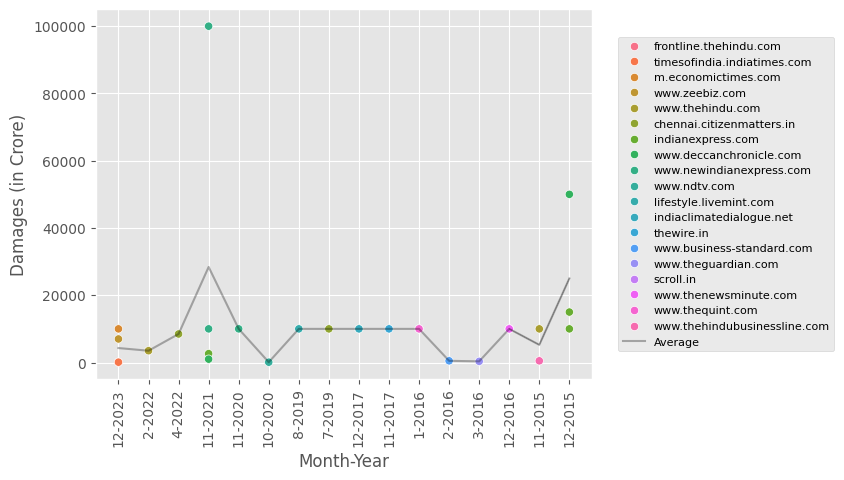

In [65]:
month = []
damages = []
site = []

for i in range(gb_df.shape[0]):
    try:
        if 'crore' in gb_df['damage'][i] or 'INR' in gb_df['damage'][i] or 'Rs' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
            te = gb_df['damage'][i].replace('[','').replace(']','')
            for k in te.split('Rs'):
                if 'crore' in k:
                    num = k.split('crore')[0].strip(".|'").strip().replace(',','')
                    n = re.findall(r'\d+', num)
                    damages.append(int(n[0]))
                    site.append(gb_df['url'][i].split('/')[2])
                    month.append(gb_df['month_year'][i])
                    break
    #     elif 'million' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'million' in k:
    #                 print('$ ',k.split('million')[0].strip(".|'").strip(), ' million')
    #                 break
    #     elif 'billion' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'billion' in k:
    #                 print('$ ',k.split('billion')[0].strip(".|'").strip(' '), ' billion')
    #                 break
    
    except:
        continue

dam_df = pd.DataFrame({'month':month, 'damages':damages, 'site':site})

avg = dam_df.groupby(dam_df['month'])['damages'].transform('mean')

p = sns.scatterplot(data = dam_df, x='month', y='damages', hue='site')
sns.lineplot(x = dam_df['month'],y = avg, color='black', alpha=0.3, label='Average')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), fontsize='8')
plt.xlabel('Month-Year')
plt.ylabel('Damages (in Crore)')
plt.xticks(rotation=90)

<h3>Mumbai

In [49]:
m_df = df[df['city']=='mumbai']

In [50]:
m_df = m_df[m_df['category'].notna()]
m_df = m_df[m_df['category'].str.contains('flood|Flood')]

In [51]:
m_df = m_df[m_df['location'].notna()]
m_df = m_df[m_df['location'].str.contains('Mumbai|Maharastra')]

In [52]:
m_df = m_df.reset_index()

In [53]:
from datetime import *
from dateutil import parser
from dateutil.relativedelta import *

month_year = []

for i in range(len(m_df['publish date'])):
    if "present" in m_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(m_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in m_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(m_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in m_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(m_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

m_df['month_year'] = month_year

In [54]:
key = []
values = []
for i in m_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

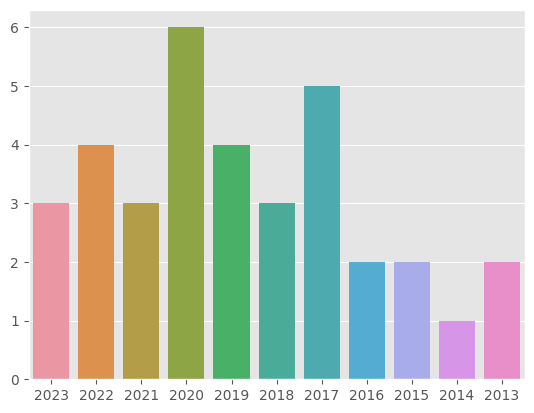

In [55]:
sns.barplot(key, values)

In [66]:
gb_df = pd.read_csv('mumbai_with_severity.csv')
gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]
gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Mumbai|Maharastra')]
# gb_df = gb_df.drop(['level_0','index'], axis=1)
gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()
    
gb_df['month_year'] = month_year

In [67]:
key = []
values = []
for i in gb_df['month_year']:
    try:
#         if i.split('-')[1] in key:
#             v = key.index(i.split('-')[1])
#             values[v] = values[v]+1
#             continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue
gb_df['year']=key

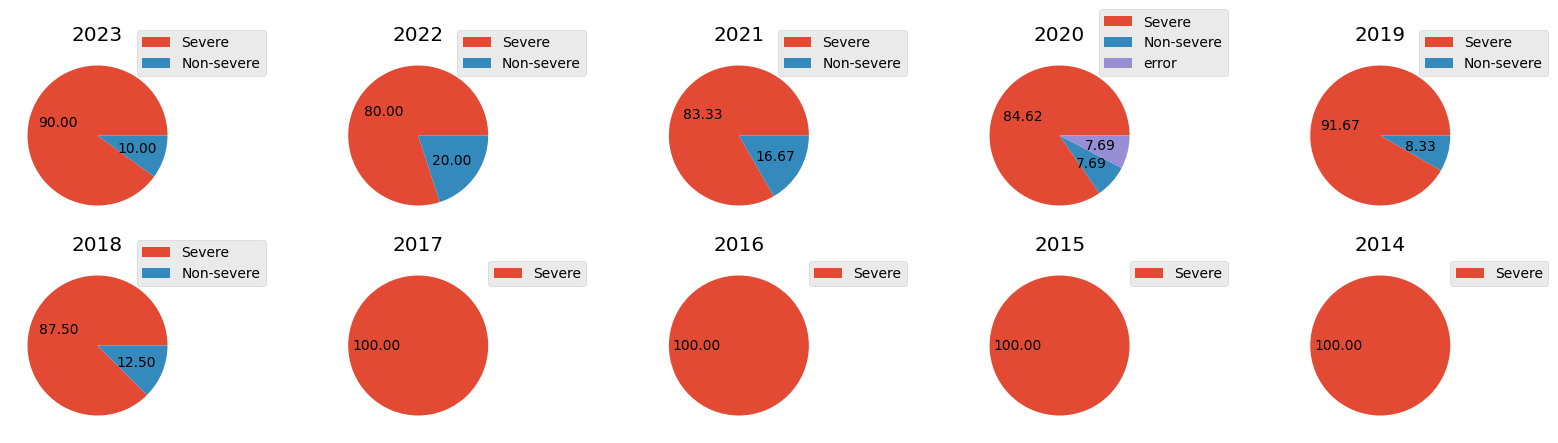

In [68]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))
for ax, col in zip(axes.flat, gb_df['year'].unique()):
    ax.pie(gb_df[gb_df['year']==col]['severity'].value_counts(), autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
    ax.legend(gb_df[gb_df['year']==col]['severity'].value_counts().index, loc='lower right', bbox_to_anchor=(1.5, 0.8))

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '7-2023'),
  Text(1, 0, '4-2022'),
  Text(2, 0, '8-2022'),
  Text(3, 0, '2-2021'),
  Text(4, 0, '9-2019'),
  Text(5, 0, '7-2018'),
  Text(6, 0, '8-2017'),
  Text(7, 0, '9-2017'),
  Text(8, 0, '12-2015'),
  Text(9, 0, '12-2013')])

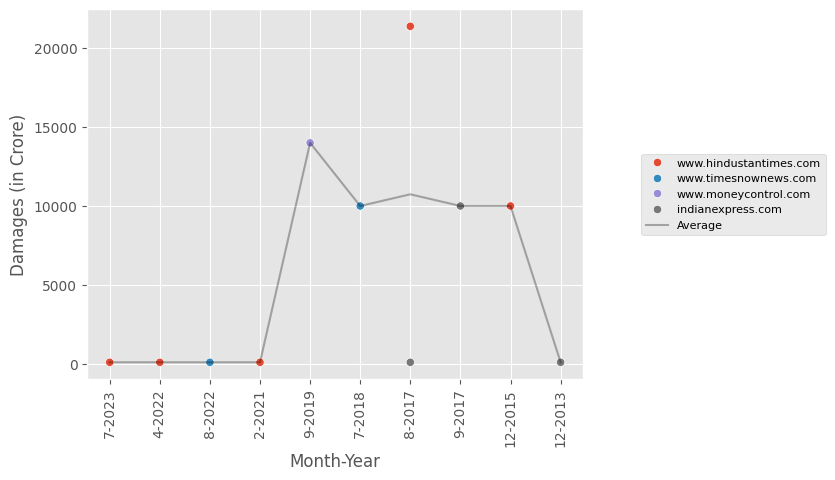

In [69]:
month = []
damages = []
site = []

for i in range(gb_df.shape[0]):
    try:
        if 'crore' in gb_df['damage'][i] or 'INR' in gb_df['damage'][i] or 'Rs' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
            te = gb_df['damage'][i].replace('[','').replace(']','')
            for k in te.split('Rs'):
                if 'crore' in k:
                    num = k.split('crore')[0].strip(".|'").strip().replace(',','')
                    n = re.findall(r'\d+', num)
                    damages.append(int(n[0]))
                    site.append(gb_df['url'][i].split('/')[2])
                    month.append(gb_df['month_year'][i])
                    break
    #     elif 'million' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'million' in k:
    #                 print('$ ',k.split('million')[0].strip(".|'").strip(), ' million')
    #                 break
    #     elif 'billion' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'billion' in k:
    #                 print('$ ',k.split('billion')[0].strip(".|'").strip(' '), ' billion')
    #                 break
    
    except:
        continue

dam_df = pd.DataFrame({'month':month, 'damages':damages, 'site':site})

avg = dam_df.groupby(dam_df['month'])['damages'].transform('mean')

p = sns.scatterplot(data = dam_df, x='month', y='damages', hue='site')
sns.lineplot(x = dam_df['month'],y = avg, color='black', alpha=0.3, label='Average')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), fontsize='8')
plt.xlabel('Month-Year')
plt.ylabel('Damages (in Crore)')
plt.xticks(rotation=90)

<h3>Delhi

In [59]:
d_df = df[df['city']=='delhi']

In [60]:
d_df = d_df[d_df['category'].notna()]
d_df = d_df[d_df['category'].str.contains('flood|Flood')]

In [61]:
d_df = d_df[d_df['location'].notna()]
d_df = d_df[d_df['location'].str.contains('Delhi')]

In [62]:
d_df = d_df.reset_index()

In [63]:
from datetime import *
from dateutil import parser
from dateutil.relativedelta import *

month_year = []

for i in range(len(d_df['publish date'])):
    if "present" in d_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(d_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in d_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(d_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in d_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(d_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

d_df['month_year'] = month_year

In [64]:
key = []
values = []
for i in d_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

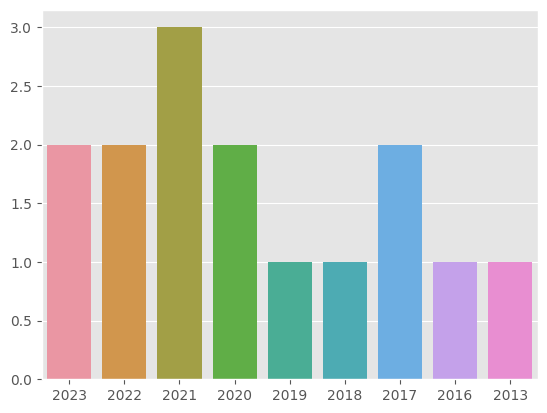

In [65]:
sns.barplot(key, values)

In [71]:
gb_df = pd.read_csv('delhi_with_severity.csv')
gb_df = gb_df[gb_df['category'].notna()]
gb_df = gb_df[gb_df['category'].str.contains('flood|Flood')]
gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Delhi')]
# gb_df = gb_df.drop(['level_0','index'], axis=1)
gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()
    
gb_df['month_year'] = month_year

In [72]:
key = []
values = []
for i in gb_df['month_year']:
    try:
#         if i.split('-')[1] in key:
#             v = key.index(i.split('-')[1])
#             values[v] = values[v]+1
#             continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue
gb_df['year']=key

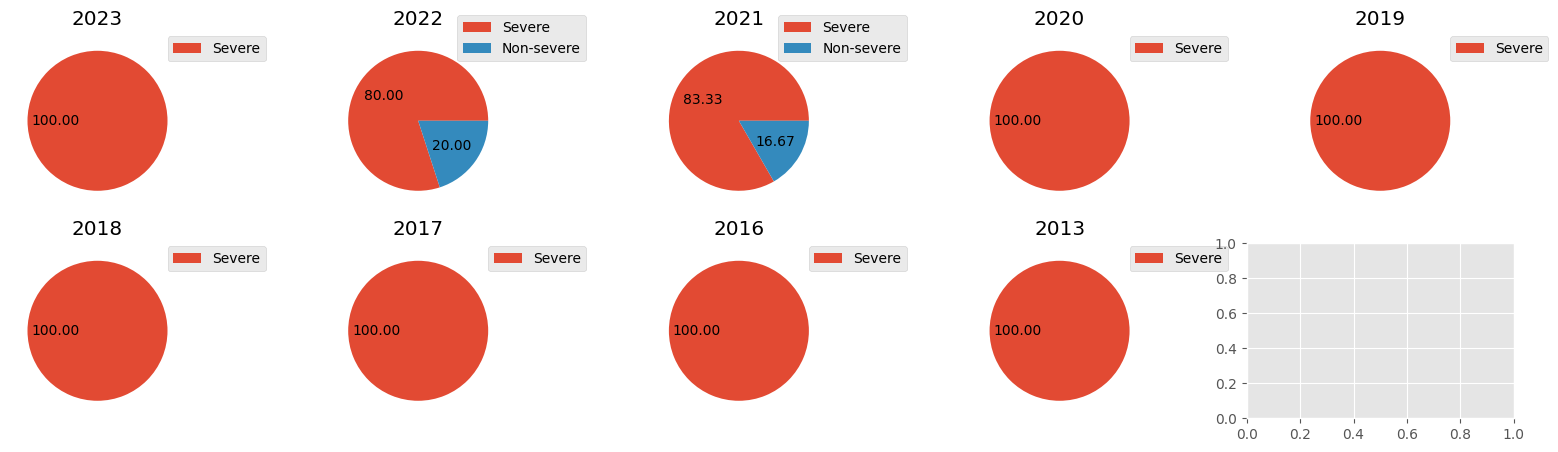

In [73]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))
for ax, col in zip(axes.flat, gb_df['year'].unique()):
    ax.pie(gb_df[gb_df['year']==col]['severity'].value_counts(), autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
    ax.legend(gb_df[gb_df['year']==col]['severity'].value_counts().index, loc='lower right', bbox_to_anchor=(1.5, 0.8))

plt.show()

([0, 1, 2], [Text(0, 0, '8-2023'), Text(1, 0, '7-2023'), Text(2, 0, '8-2021')])

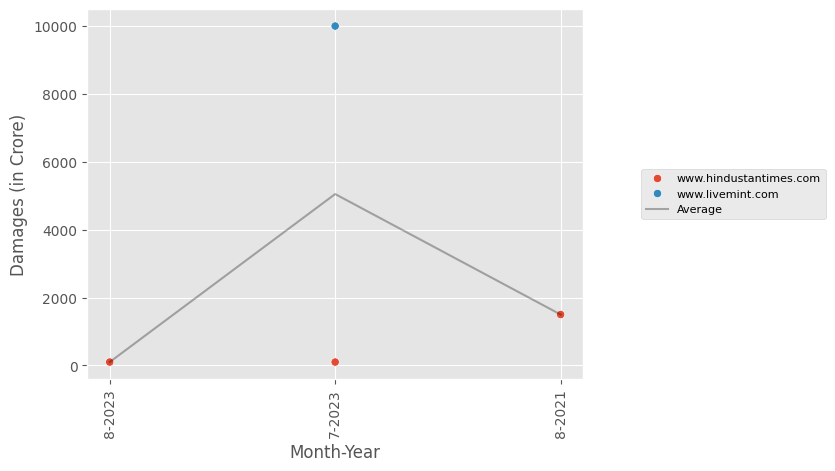

In [74]:
month = []
damages = []
site = []

for i in range(gb_df.shape[0]):
    try:
        if 'crore' in gb_df['damage'][i] or 'INR' in gb_df['damage'][i] or 'Rs' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
            te = gb_df['damage'][i].replace('[','').replace(']','')
            for k in te.split('Rs'):
                if 'crore' in k:
                    num = k.split('crore')[0].strip(".|'").strip().replace(',','')
                    n = re.findall(r'\d+', num)
                    damages.append(int(n[0]))
                    site.append(gb_df['url'][i].split('/')[2])
                    month.append(gb_df['month_year'][i])
                    break
    #     elif 'million' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'million' in k:
    #                 print('$ ',k.split('million')[0].strip(".|'").strip(), ' million')
    #                 break
    #     elif 'billion' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'billion' in k:
    #                 print('$ ',k.split('billion')[0].strip(".|'").strip(' '), ' billion')
    #                 break
    
    except:
        continue

dam_df = pd.DataFrame({'month':month, 'damages':damages, 'site':site})

avg = dam_df.groupby(dam_df['month'])['damages'].transform('mean')

p = sns.scatterplot(data = dam_df, x='month', y='damages', hue='site')
sns.lineplot(x = dam_df['month'],y = avg, color='black', alpha=0.3, label='Average')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), fontsize='8')
plt.xlabel('Month-Year')
plt.ylabel('Damages (in Crore)')
plt.xticks(rotation=90)

<h3>Pune

In [69]:
d = pd.read_csv('add_cities_gemini.csv')

In [70]:
p_df = d[d['city']=='pune']

In [71]:
p_df = p_df[p_df['cat'].notna()]
p_df = p_df[p_df['cat'].str.contains('flood|Flood')]

In [72]:
p_df = p_df[p_df['location'].notna()]
p_df = p_df[p_df['location'].str.contains('Pune|Maharastra')]

In [73]:
p_df = p_df.reset_index()

In [74]:
month_year = []

for i in range(len(p_df['publish date'])):
    if "present" in p_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(p_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in p_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(p_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in p_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(p_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

p_df['month_year'] = month_year

In [75]:
key = []
values = []
for i in p_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

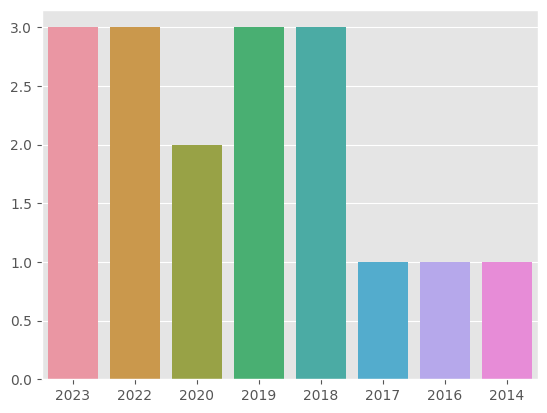

In [76]:
sns.barplot(key, values)

In [75]:
gb_df = pd.read_csv('pune_with_severity.csv')
gb_df = gb_df[gb_df['city']=='pune']
gb_df = gb_df[gb_df['cat'].notna()]
gb_df = gb_df[gb_df['cat'].str.contains('flood|Flood')]
gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Pune|Maharastra')]
# gb_df = gb_df.drop(['level_0','index'], axis=1)
gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()
    
gb_df['month_year'] = month_year

In [76]:
key = []
values = []
for i in gb_df['month_year']:
    try:
#         if i.split('-')[1] in key:
#             v = key.index(i.split('-')[1])
#             values[v] = values[v]+1
#             continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue
gb_df['year']=key

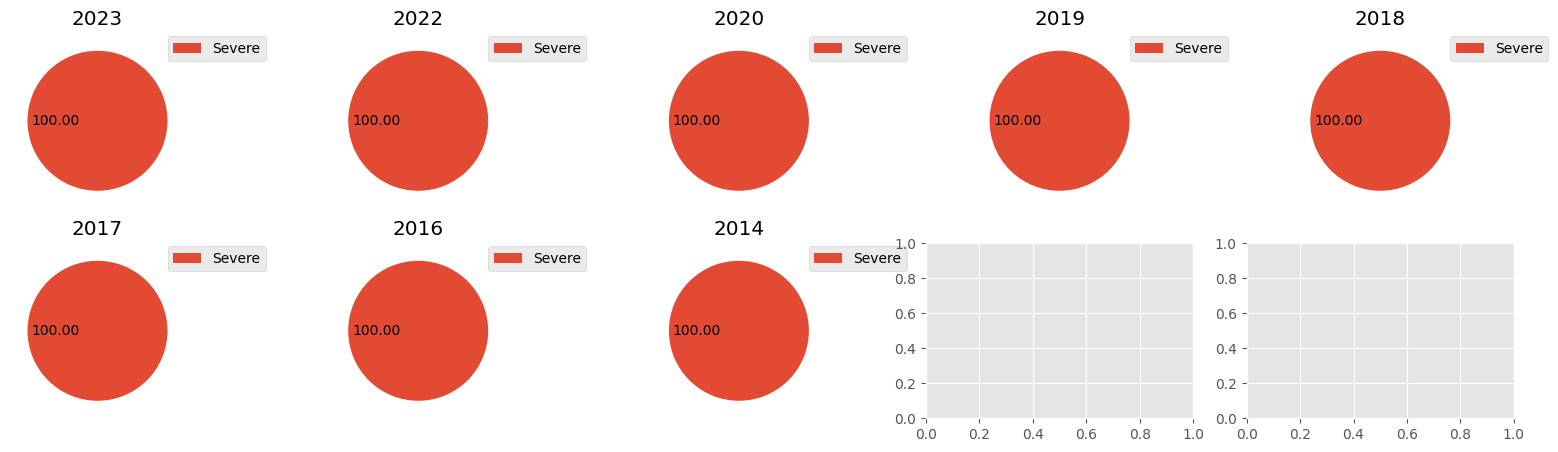

In [77]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))
for ax, col in zip(axes.flat, gb_df['year'].unique()):
    ax.pie(gb_df[gb_df['year']==col]['severity'].value_counts(), autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
    ax.legend(gb_df[gb_df['year']==col]['severity'].value_counts().index, loc='lower right', bbox_to_anchor=(1.5, 0.8))

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

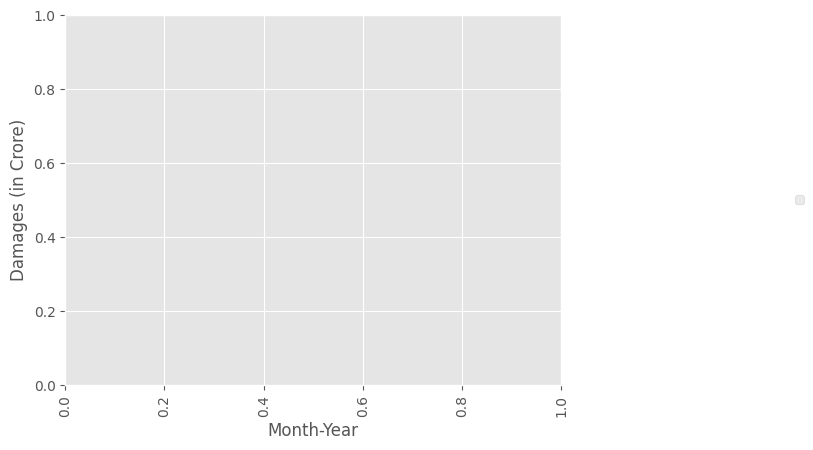

In [78]:
month = []
damages = []
site = []

for i in range(gb_df.shape[0]):
    try:
        if 'crore' in gb_df['damage'][i] or 'INR' in gb_df['damage'][i] or 'Rs' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
            te = gb_df['damage'][i].replace('[','').replace(']','')
            for k in te.split('Rs'):
                if 'crore' in k:
                    num = k.split('crore')[0].strip(".|'").strip().replace(',','')
                    n = re.findall(r'\d+', num)
                    damages.append(int(n[0]))
                    site.append(gb_df['url'][i].split('/')[2])
                    month.append(gb_df['month_year'][i])
                    break
    #     elif 'million' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'million' in k:
    #                 print('$ ',k.split('million')[0].strip(".|'").strip(), ' million')
    #                 break
    #     elif 'billion' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'billion' in k:
    #                 print('$ ',k.split('billion')[0].strip(".|'").strip(' '), ' billion')
    #                 break
    
    except:
        continue

dam_df = pd.DataFrame({'month':month, 'damages':damages, 'site':site})

avg = dam_df.groupby(dam_df['month'])['damages'].transform('mean')

p = sns.scatterplot(data = dam_df, x='month', y='damages', hue='site')
sns.lineplot(x = dam_df['month'],y = avg, color='black', alpha=0.3, label='Average')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), fontsize='8')
plt.xlabel('Month-Year')
plt.ylabel('Damages (in Crore)')
plt.xticks(rotation=90)

<h3>Kolkata

In [81]:
k_df = d[d['city']=='kolkata']

In [82]:
k_df = k_df[k_df['cat'].notna()]
k_df = k_df[k_df['cat'].str.contains('flood|Flood')]

In [83]:
k_df = k_df[k_df['location'].notna()]
k_df = k_df[k_df['location'].str.contains('Kolkata|West')]

In [84]:
k_df = k_df.reset_index()

In [85]:
month_year = []

for i in range(len(k_df['publish date'])):
    if "present" in k_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(k_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in k_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(k_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in k_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(k_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

k_df['month_year'] = month_year

In [86]:
key = []
values = []
for i in k_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

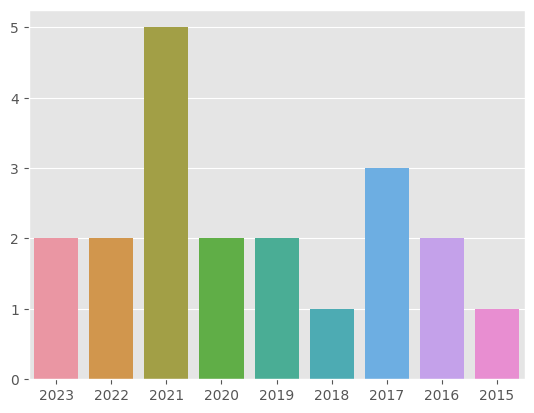

In [87]:
sns.barplot(key, values)

In [86]:
gb_df = pd.read_csv('kolkata_with_severity.csv')
gb_df = gb_df[gb_df['city']=='kolkata']
gb_df = gb_df[gb_df['cat'].notna()]
gb_df = gb_df[gb_df['cat'].str.contains('flood|Flood')]
gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Kolkata|Bengal|Calcutta')]
gb_df['severity'] = gb_df['severity'].replace('severe','Severe')
# gb_df = gb_df.drop(['level_0','index'], axis=1)
gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()
    
gb_df['month_year'] = month_year

In [87]:
key = []
values = []
for i in gb_df['month_year']:
    try:
#         if i.split('-')[1] in key:
#             v = key.index(i.split('-')[1])
#             values[v] = values[v]+1
#             continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue
gb_df['year']=key

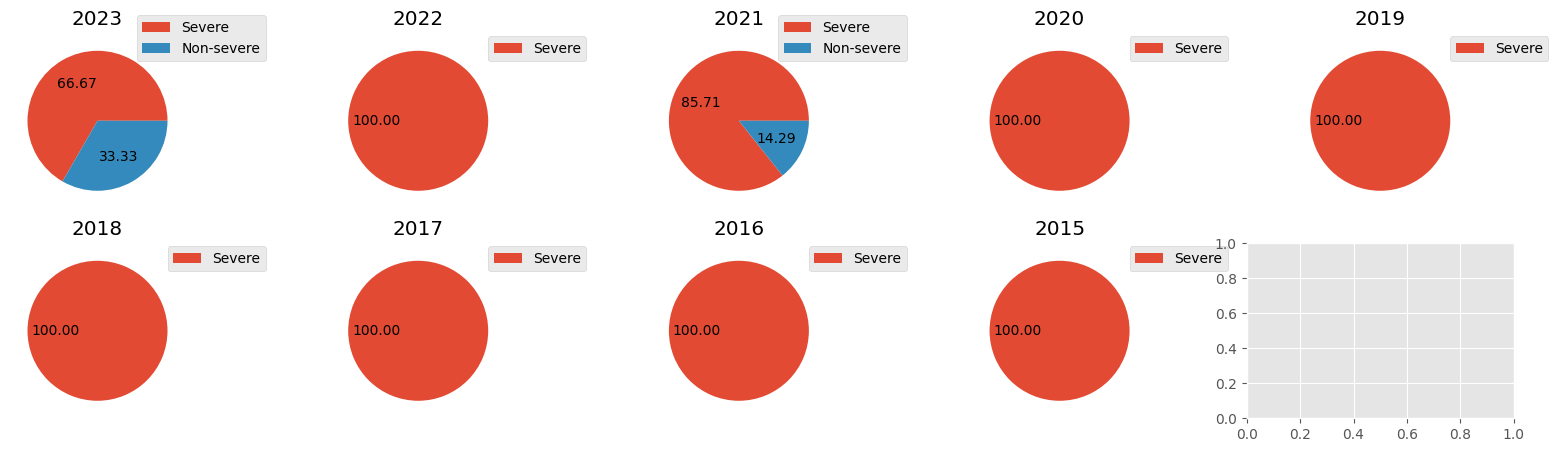

In [88]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))
for ax, col in zip(axes.flat, gb_df['year'].unique()):
    ax.pie(gb_df[gb_df['year']==col]['severity'].value_counts(), autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
    ax.legend(gb_df[gb_df['year']==col]['severity'].value_counts().index, loc='lower right', bbox_to_anchor=(1.5, 0.8))

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

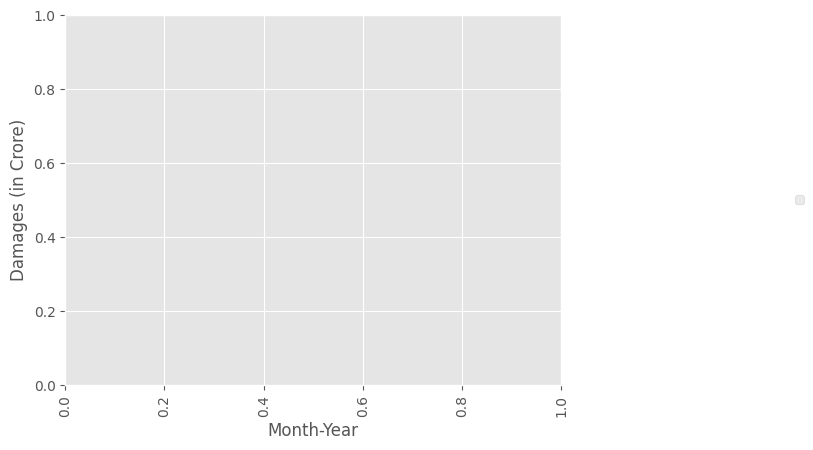

In [89]:
month = []
damages = []
site = []

for i in range(gb_df.shape[0]):
    try:
        if 'crore' in gb_df['damage'][i] or 'INR' in gb_df['damage'][i] or 'Rs' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
            te = gb_df['damage'][i].replace('[','').replace(']','')
            for k in te.split('Rs'):
                if 'crore' in k:
                    num = k.split('crore')[0].strip(".|'").strip().replace(',','')
                    n = re.findall(r'\d+', num)
                    damages.append(int(n[0]))
                    site.append(gb_df['url'][i].split('/')[2])
                    month.append(gb_df['month_year'][i])
                    break
    #     elif 'million' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'million' in k:
    #                 print('$ ',k.split('million')[0].strip(".|'").strip(), ' million')
    #                 break
    #     elif 'billion' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'billion' in k:
    #                 print('$ ',k.split('billion')[0].strip(".|'").strip(' '), ' billion')
    #                 break
    
    except:
        continue

dam_df = pd.DataFrame({'month':month, 'damages':damages, 'site':site})

avg = dam_df.groupby(dam_df['month'])['damages'].transform('mean')

p = sns.scatterplot(data = dam_df, x='month', y='damages', hue='site')
sns.lineplot(x = dam_df['month'],y = avg, color='black', alpha=0.3, label='Average')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), fontsize='8')
plt.xlabel('Month-Year')
plt.ylabel('Damages (in Crore)')
plt.xticks(rotation=90)

<h3>Ahmedabad

In [88]:
a_df = d[d['city']=='ahmedabad']

In [89]:
a_df = a_df[a_df['cat'].notna()]
a_df = a_df[a_df['cat'].str.contains('flood|Flood')]

In [90]:
a_df = a_df[a_df['location'].notna()]
a_df = a_df[a_df['location'].str.contains('Ahmedabad')]

In [91]:
a_df = a_df.reset_index()

In [92]:
month_year = []

for i in range(len(a_df['publish date'])):
    if "present" in a_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(a_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in a_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(a_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in a_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(a_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()

a_df['month_year'] = month_year

In [93]:
key = []
values = []
for i in a_df['month_year'].unique():
    try:
        if i.split('-')[1] in key:
            v = key.index(i.split('-')[1])
            values[v] = values[v]+1
            continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue

F:\softwares\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\softwares\ana\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

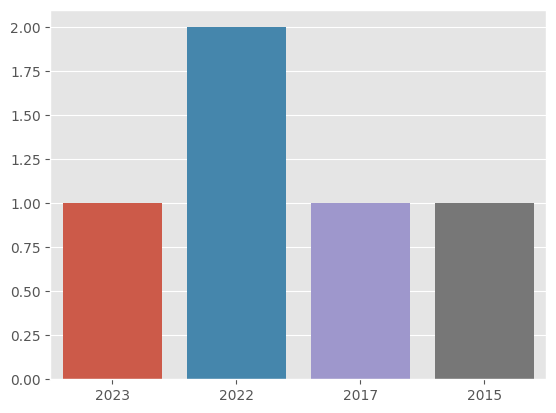

In [94]:
sns.barplot(key, values)

In [90]:
gb_df = pd.read_csv('ahmedabad_with_severity.csv')
gb_df = gb_df[gb_df['city']=='ahmedabad']
gb_df = gb_df[gb_df['cat'].notna()]
gb_df = gb_df[gb_df['cat'].str.contains('flood|Flood')]
gb_df = gb_df[gb_df['location'].notna()]
gb_df = gb_df[gb_df['location'].str.contains('Ahmedabad')]
# gb_df = gb_df.drop(['level_0','index'], axis=1)
gb_df = gb_df.reset_index()

month_year = []

for i in range(len(gb_df['publish date'])):
    if "present" in gb_df['publish date'][i].lower():
        month_year.append('NA')
        continue
    try:
        datee = parser.parse(gb_df['publish date'][i])
    except:
        NOW = datetime.now()
        if 'month' in gb_df['publish date'][i].lower():
            datee = NOW-relativedelta(months=int(gb_df['publish date'][i].lower().split(' ')[0]))
        elif 'week' in gb_df['publish date'][i].lower():
            NOW-relativedelta(weeks=int(gb_df['publish date'][i].lower().split(' ')[0]))
    #print(datee)
    month_year.append(str(datee.month) + '-' + str(datee.year))
    #print(datee.year)
    #print()
    
gb_df['month_year'] = month_year

In [91]:
key = []
values = []
for i in gb_df['month_year']:
    try:
#         if i.split('-')[1] in key:
#             v = key.index(i.split('-')[1])
#             values[v] = values[v]+1
#             continue
        key.append(i.split('-')[1])
        values.append(1)
    except:
        continue
gb_df['year']=key

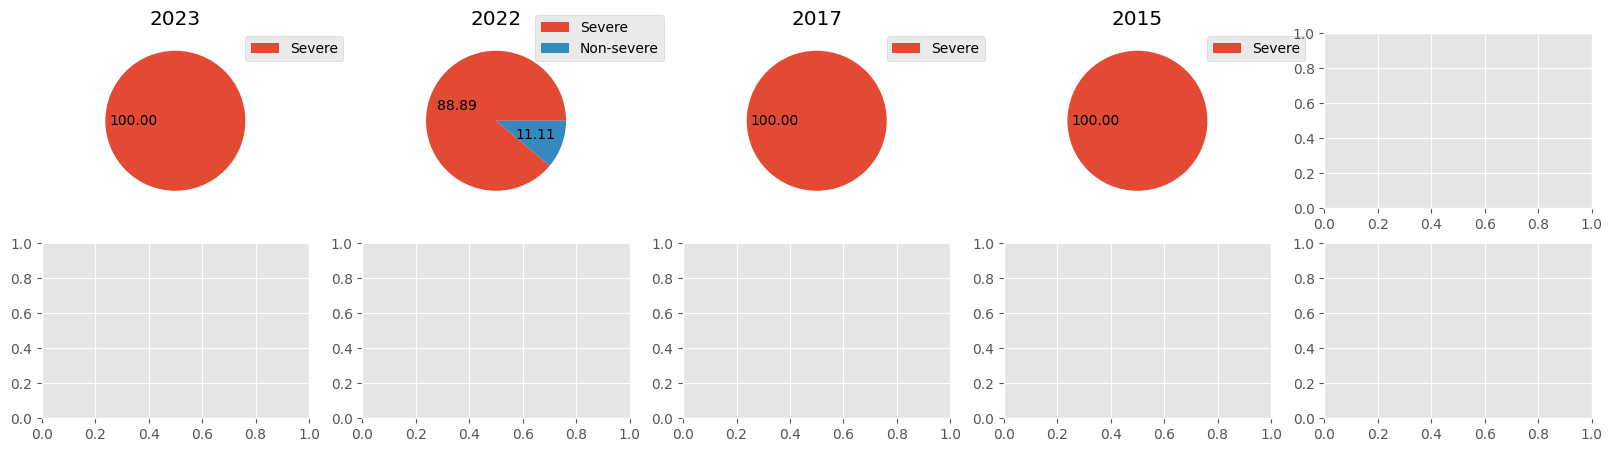

In [92]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,5))
for ax, col in zip(axes.flat, gb_df['year'].unique()):
    ax.pie(gb_df[gb_df['year']==col]['severity'].value_counts(), autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
    ax.legend(gb_df[gb_df['year']==col]['severity'].value_counts().index, loc='lower right', bbox_to_anchor=(1.5, 0.8))

plt.show()

([0], [Text(0, 0, '7-2022')])

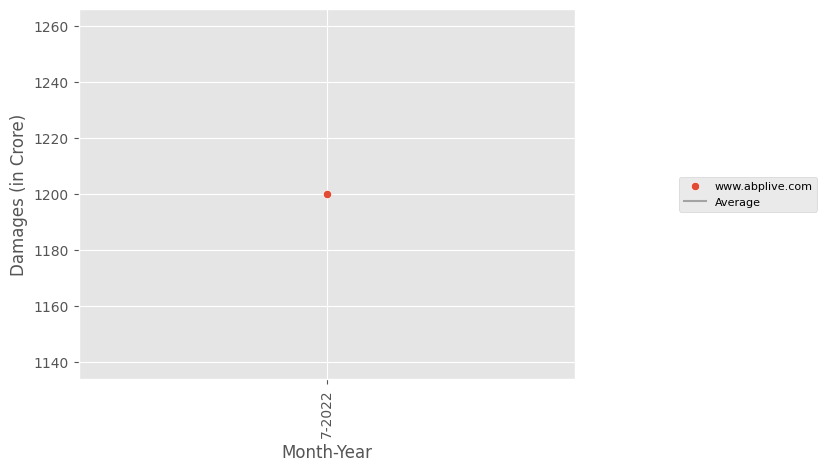

In [93]:
month = []
damages = []
site = []

for i in range(gb_df.shape[0]):
    try:
        if 'crore' in gb_df['damage'][i] or 'INR' in gb_df['damage'][i] or 'Rs' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
            te = gb_df['damage'][i].replace('[','').replace(']','')
            for k in te.split('Rs'):
                if 'crore' in k:
                    num = k.split('crore')[0].strip(".|'").strip().replace(',','')
                    n = re.findall(r'\d+', num)
                    damages.append(int(n[0]))
                    site.append(gb_df['url'][i].split('/')[2])
                    month.append(gb_df['month_year'][i])
                    break
    #     elif 'million' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'million' in k:
    #                 print('$ ',k.split('million')[0].strip(".|'").strip(), ' million')
    #                 break
    #     elif 'billion' in gb_df['damage'][i]:
    #         print(gb_df['damage'][i])
    #         te = gb_df['damage'][i].replace('[','').replace(']','')
    #         for k in te.split('$'):
    #             if 'billion' in k:
    #                 print('$ ',k.split('billion')[0].strip(".|'").strip(' '), ' billion')
    #                 break
    
    except:
        continue

dam_df = pd.DataFrame({'month':month, 'damages':damages, 'site':site})

avg = dam_df.groupby(dam_df['month'])['damages'].transform('mean')

p = sns.scatterplot(data = dam_df, x='month', y='damages', hue='site')
sns.lineplot(x = dam_df['month'],y = avg, color='black', alpha=0.3, label='Average')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), fontsize='8')
plt.xlabel('Month-Year')
plt.ylabel('Damages (in Crore)')
plt.xticks(rotation=90)